# Data description

## link dataset: https://www.kaggle.com/rikdifos/credit-card-approval-prediction

### Context
Credit score cards are a common risk control method in the financial industry. It uses personal information and data submitted by credit card applicants to predict the probability of future defaults and credit card borrowings. The bank is able to decide whether to issue a credit card to the applicant. Credit scores can objectively quantify the magnitude of risk.
 
Generally speaking, credit score cards are based on historical data. Once encountering large economic fluctuations. Past models may lose their original predictive power. Logistic model is a common method for credit scoring. Because Logistic is suitable for binary classification tasks and can calculate the coefficients of each feature. In order to facilitate understanding and operation, the score card will multiply the logistic regression coefficient by a certain value (such as 100) and round it.
 
At present, with the development of machine learning algorithms. More predictive methods such as Boosting, Random Forest, and Support Vector Machines have been introduced into credit card scoring. However, these methods often do not have good transparency. It may be difficult to provide customers and regulators with a reason for rejection or acceptance.

### Task
Build a machine learning model to predict if an applicant is 'good' or 'bad' client, different from other tasks, the definition of 'good' or 'bad' is not given. You should use some techique, such as vintage analysis to construct you label. Also, unbalance data problem is a big problem in this task.


<table>
<thead>
<tr>
<th>application_record.csv</th>
<th></th>
<th></th>
</tr>
</thead>
<tbody>
<tr>
<td>Feature name</td>
<td>Explanation</td>
<td>Remarks</td>
</tr>
<tr>
<td><code>ID</code></td>
<td>Client number</td>
<td></td>
</tr>
<tr>
<td><code>CODE_GENDER</code></td>
<td>Gender</td>
<td></td>
</tr>
<tr>
<td><code>FLAG_OWN_CAR</code></td>
<td>Is there a car</td>
<td></td>
</tr>
<tr>
<td><code>FLAG_OWN_REALTY</code></td>
<td>Is there a property</td>
<td></td>
</tr>
<tr>
<td><code>CNT_CHILDREN</code></td>
<td>Number of children</td>
<td></td>
</tr>
<tr>
<td><code>AMT_INCOME_TOTAL</code></td>
<td>Annual income</td>
<td></td>
</tr>
<tr>
<td><code>NAME_INCOME_TYPE</code></td>
<td>Income category</td>
<td></td>
</tr>
<tr>
<td><code>NAME_EDUCATION_TYPE</code></td>
<td>Education level</td>
<td></td>
</tr>
<tr>
<td><code>NAME_FAMILY_STATUS</code></td>
<td>Marital status</td>
<td></td>
</tr>
<tr>
<td><code>NAME_HOUSING_TYPE</code></td>
<td>Way of living</td>
<td></td>
</tr>
<tr>
<td><code>DAYS_BIRTH</code></td>
<td>Birthday</td>
<td>Count backwards from current day (0), -1 means yesterday</td>
</tr>
<tr>
<td><code>DAYS_EMPLOYED</code></td>
<td>Start date  of employment</td>
<td>Count backwards from current day(0). If  positive, it means the person currently unemployed.</td>
</tr>
<tr>
<td><code>FLAG_MOBIL</code></td>
<td>Is there a mobile   phone</td>
<td></td>
</tr>
<tr>
<td><code>FLAG_WORK_PHONE</code></td>
<td>Is there a work phone</td>
<td></td>
</tr>
<tr>
<td><code>FLAG_PHONE</code></td>
<td>Is there a phone</td>
<td></td>
</tr>
<tr>
<td><code>FLAG_EMAIL</code></td>
<td>Is there an email</td>
<td></td>
</tr>
<tr>
<td><code>OCCUPATION_TYPE</code></td>
<td>Occupation</td>
<td></td>
</tr>
<tr>
<td><code>CNT_FAM_MEMBERS</code></td>
<td>Family size</td>
<td></td>
</tr>
</tbody>
</table>

<table>
<thead>
<tr>
<th>credit_record.csv</th>
<th></th>
<th></th>
</tr>
</thead>
<tbody>
<tr>
<td>Feature name</td>
<td>Explanation</td>
<td>Remarks</td>
</tr>
<tr>
<td><code>ID</code></td>
<td>Client number</td>
<td></td>
</tr>
<tr>
<td><code>MONTHS_BALANCE</code></td>
<td>Record month</td>
<td>The month of the extracted data is the starting point,  backwards, 0 is the current month, -1 is the previous month,  and so on</td>
</tr>
<tr>
<td><code>STATUS</code></td>
<td>Status</td>
<td>0: 1-29 days past due 1: 30-59 days past due   2: 60-89 days overdue 3: 90-119 days overdue    4: 120-149 days overdue 5: Overdue or bad debts, write-offs for more than 150 days    C: paid off that month X: No loan for the month</td>
</tr>
</tbody>
</table>

# imports and setup

In [108]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier

# Pre-processing

In [2]:
df_credit_record = pd.read_csv("datasets/credit_record.csv")
df_application_record = pd.read_csv("datasets/application_record.csv")

In [3]:
df_credit_record.head()

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C


In [4]:
df_application_record.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0


## Avaliação do cliente

Como o dataset não possui o label de quem é bom ou mal cliente, essa avaliação deverá ser feita a partir dos dados já existentes. Para isso eu vou usar o dataset credit_record que possui informações sobre o pagamento mensal do cartão de credito por parte dos clientes. Nesse caso, a avaliação do cliente vai ser realizada da seguinte forma:

número de meses não endividado /  número de meses com emprestimo 

In [29]:
# Analise do dataset credit_record.csv
ProfileReport(df_credit_record,  minimal=True, explorative=True).to_widgets()

In [62]:
# Count of custumers in eacth status 

df_count_status = df_credit_record.groupby("STATUS", as_index=False).agg(COUNT=("ID", lambda ids: len(set(ids))))
df_count_status

,STATUS,COUNT
0,0,39980
1,1,5201
2,2,597
3,3,268
4,4,190
5,5,195
6,C,22707
7,X,25005


Text(0.5, 1.0, 'Count of custumers in eacth status')

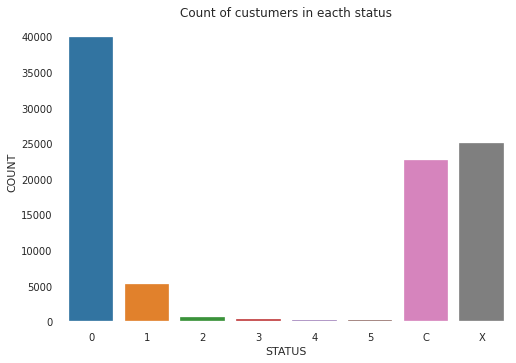

In [63]:
ax = sns.barplot(data=df_count_status, x="STATUS", y="COUNT")
ax.set_title("Count of custumers in eacth status")

In [33]:
# calculate customer credit score

def eval_func(status_list):
    if not np.all(status_list == "X"):
        status_list = status_list[status_list != "X"]
        not_debt_opcs = ["0", "C"]
        count_not_debt = sum([(status_list == not_debt_opc).sum() for not_debt_opc in not_debt_opcs])
        
        return count_not_debt/len(status_list)
    else:
        return -1


evaluation_credit_df = df_credit_record.groupby("ID", as_index=False).agg(EVALUATION=("STATUS", eval_func))

In [30]:
# barplot with number os customers in eacth of following categories 
# 1: never borrowed money
# 2: not indebted
# 3: indebted

num_customers_never_borrowed_money = (evaluation_credit_df["EVALUATION"] == -1).sum()
num_customers_not_indebted = (evaluation_credit_df["EVALUATION"] == 1).sum()
num_customers_indebted = len(evaluation_credit_df) - num_customers_never_borrowed_money - num_customers_not_indebted
y=[num_customers_never_borrowed_money, num_customers_not_indebted, num_customers_indebted]
labels = ["never borrowed money", "not indebted", "indebted"]
fig = go.Figure(data=[go.Bar(
            x=labels, y=y,
            text=y,
            textposition='auto',
        )])
#fig.set_ylabel("Number customers")
fig.update_layout(yaxis_title="Number customers", title="Division of customers")
fig.show()

In [35]:
# filter customers with id in credit_record dataset and application_record dataset

customers_ids = set(evaluation_credit_df["ID"].values)

df_application_record_with_evaluation = df_application_record[df_application_record.ID.isin(customers_ids)].join(
    evaluation_credit_df.set_index("ID"), on="ID")
df_application_record_with_evaluation

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,EVALUATION
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,0.933333
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,0.928571
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0,1.000000
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,1.000000
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,-1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
434808,5149828,M,Y,Y,0,315000.0,Working,Secondary / secondary special,Married,House / apartment,-17348,-2420,1,0,0,0,Managers,2.0,0.000000
434809,5149834,F,N,Y,0,157500.0,Commercial associate,Higher education,Married,House / apartment,-12387,-1325,1,0,1,1,Medicine staff,2.0,0.250000
434810,5149838,F,N,Y,0,157500.0,Pensioner,Higher education,Married,House / apartment,-12387,-1325,1,0,1,1,Medicine staff,2.0,0.454545
434811,5150049,F,N,Y,0,283500.0,Working,Secondary / secondary special,Married,House / apartment,-17958,-655,1,0,0,0,Sales staff,2.0,0.800000


## Analise do dataset application_record_with_evaluation

### Análise dos atributos

<b>FLAG_OWN_CAR:</b> Cerca de 62% das pessoas no dataset não possuem carro <br>
<b>FLAG_OWN_REALTY:</b> Cerca de 34% das pessoas no dataset não possuem imovel próprio <br>
<b>CNT_CHILDREN:</b> Cerca de 70% das pessoas no dataset não possuem filhos <br>
<b>NAME_EDUCATION_TYPE:</b> Cerca de 70% das pessoas no dataset estudaram até a segunda grade (especie de ensino fundamental com médio) <br>
<b>NAME_FAMILY_STATUS:</b> Cerca de 70% das pessoas no dataset são casadas. <br>
<b>DAYS_EMPLOYED:</b> Cerca de 17% das pessoas no dataset estão desempregadas <br>
<b>FLAG_WORK_PHONE:</b> Cerca de 77% das pessoas no dataset não possuem telefone de trabalho. <br>

### Pré-processamento atributos

<b>OCCUPATION_TYPE:</b> Substituir valores NaN em OCCUPATION_TYPE pela string NONE <br>
<b>NAME_EDUCATION_TYPE:</b> Converter o atributo NAME_EDUCATION_TYPE para inteiro <br>
<b>DAYS_BIRTH:</b> Converter DAYS_BIRTH em idade <br>
<b>DAYS_EMPLOYED:</b> Converter atributos possitivos para negativos e vice-versa (O motivo é porque a contagem é feita de forma invertida) <br>
<b>DAYS_EMPLOYED:</b> Criar atributo derivado se o empregado está empregado ou não. <br>
<b>FLAGS (FLAG_OWN_CAR, FLAG_OWN_REALTY): </b> Converter flags para valor inteiro (0, 1) 

In [43]:
ProfileReport(df_application_record_with_evaluation,  minimal=True, explorative=True).to_widgets()

#### OCCUPATION_TYPE

In [47]:
df_application_record_with_evaluation["OCCUPATION_TYPE"].replace(np.nan, "NONE", inplace=True)
df_application_record_with_evaluation["OCCUPATION_TYPE"].describe()

count     36457
unique       19
top        NONE
freq      11323
Name: OCCUPATION_TYPE, dtype: object

#### NAME_EDUCATION_TYPE

Esse atributo pode ser ordenado de acordo com cada categoria da seguinte forma:
1. Lower secondary
2. Secondary / secondary special
3. Incomplete higher
4. Higher education
5. Academic degree

In [50]:
dict_ = {
    "Lower secondary": 1,
    "Secondary / secondary special": 2,
    "Incomplete higher": 3,
    "Higher education": 4,
    "Academic degree": 5
}

df_application_record_with_evaluation["NAME_EDUCATION_TYPE"].replace(dict_, inplace=True)
df_application_record_with_evaluation["NAME_EDUCATION_TYPE"].describe()

count    36457.000000
mean         2.572181
std          0.900959
min          1.000000
25%          2.000000
50%          2.000000
75%          4.000000
max          5.000000
Name: NAME_EDUCATION_TYPE, dtype: float64

#### DAYS_BIRTH

In [52]:
df_application_record_with_evaluation["AGE"] = df_application_record_with_evaluation["DAYS_BIRTH"].map(lambda d: -1 * d//365)
df_application_record_with_evaluation["AGE"].describe()

count    36457.000000
mean        43.260334
std         11.510414
min         20.000000
25%         34.000000
50%         42.000000
75%         53.000000
max         68.000000
Name: AGE, dtype: float64

#### DAYS_EMPLOYED

In [54]:
df_application_record_with_evaluation["EMPLOYED"] = df_application_record_with_evaluation["DAYS_EMPLOYED"].map(lambda v: 1 if v<0 else 0)
df_application_record_with_evaluation["EMPLOYED"].describe()

count    36457.00000
mean         0.83172
std          0.37412
min          0.00000
25%          1.00000
50%          1.00000
75%          1.00000
max          1.00000
Name: EMPLOYED, dtype: float64

In [55]:
df_application_record_with_evaluation["DAYS_EMPLOYED"] = df_application_record_with_evaluation["DAYS_EMPLOYED"].values * -1
df_application_record_with_evaluation["DAYS_EMPLOYED"].describe()

count     36457.000000
mean     -59262.935568
std      137651.334859
min     -365243.000000
25%         408.000000
50%        1552.000000
75%        3153.000000
max       15713.000000
Name: DAYS_EMPLOYED, dtype: float64

#### Convert attributes from categorical to numeric (FLAG_OWN_CAR, FLAG_OWN_REALTY, CODE_GENDER, NAME_INCOME_TYPE, NAME_FAMILY_STATUS, NAME_HOUSING_TYPE, OCCUPATION_TYPE)


In [122]:
attrs = ["FLAG_OWN_CAR", "FLAG_OWN_REALTY", "CODE_GENDER", "NAME_INCOME_TYPE", "NAME_FAMILY_STATUS", "NAME_HOUSING_TYPE", "OCCUPATION_TYPE"]

for attr in attrs:
    le = LabelEncoder()
    le.fit(df_application_record_with_evaluation[attr].values)
    df_application_record_with_evaluation[attr] = le.transform(df_application_record_with_evaluation[attr].values)

# Analysis

Text(0.5, 1.0, 'customoers age')

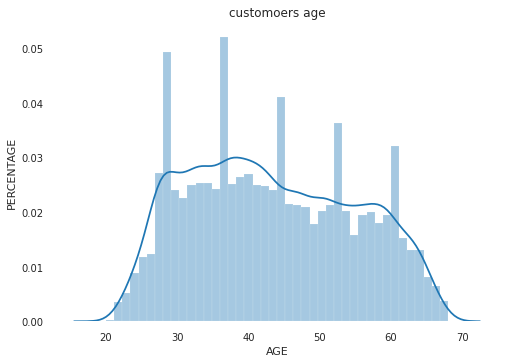

In [67]:
# customers age distplot 

ax = sns.distplot(df_application_record_with_evaluation["AGE"])
ax.set_ylabel("PERCENTAGE")
ax.set_title("customoers age")

Text(0.5, 1.0, 'customoers total income')

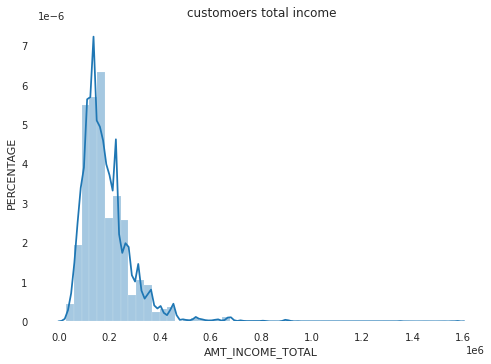

In [66]:
# customers total income distplot

ax = sns.distplot(df_application_record_with_evaluation["AMT_INCOME_TOTAL"])
ax.set_ylabel("PERCENTAGE")
ax.set_title("customoers total income")

Text(0.5, 1.0, 'customoers credit score')

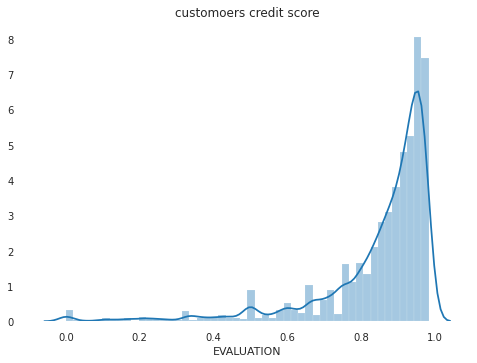

In [77]:
# indebted customers credit score distplot

s = df_application_record_with_evaluation["EVALUATION"]
s = s[(s!=-1) & (s!=1)]
ax = sns.distplot(s)
ax.set_title("customoers credit score")

## Correlation graph 

A corralação dos atributos com a variável EVALUATION aprensentou valores muitos baixos, indicando iniciamente não haver corralação entre os atributos do dataset e o comportamento do cliente (Isso pode ser devido à forma simplificada da avaliação do credit score do cliente)

<ipython-input-124-294b2346fef7>:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<AxesSubplot:>

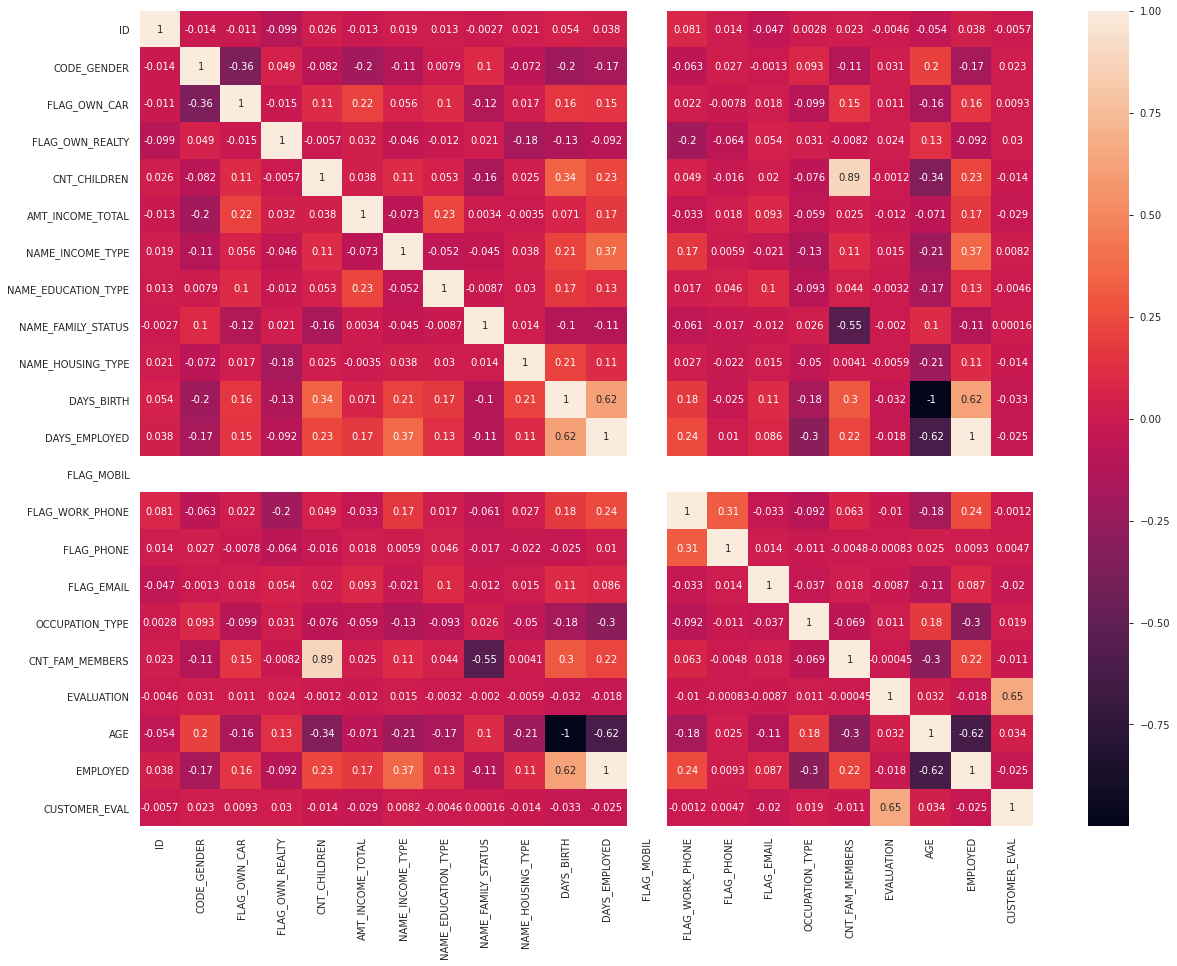

In [124]:
# filter out customers with  EVALUATION -1

def filter_fn(dict_):
    evaluation = dict_["EVALUATION"]
    return evaluation != -1

df = df_application_record_with_evaluation
m = df.apply(filter_fn, axis=1)
df = df[m]

# binarize EVALUATION
df["CUSTOMER_EVAL"] = df["EVALUATION"].map(lambda v:-1 if v < 1 else 1)

# plot corr graph
fig = plt.figure(figsize=(20, 15))
ax = fig.add_subplot()
sns.heatmap(df.corr(), annot=True, ax=ax)

# Random forest modeling

In [127]:
# prepare data and train model

train_params = ["CODE_GENDER", "FLAG_OWN_CAR", "FLAG_OWN_REALTY", "CNT_CHILDREN", "AMT_INCOME_TOTAL", 
                "NAME_INCOME_TYPE", "NAME_EDUCATION_TYPE", "NAME_FAMILY_STATUS", "NAME_HOUSING_TYPE",
                "DAYS_EMPLOYED", "FLAG_MOBIL", "FLAG_WORK_PHONE", "FLAG_PHONE", "FLAG_EMAIL", 
                "OCCUPATION_TYPE", "CNT_FAM_MEMBERS", "AGE", "EMPLOYED"]

dataX, dataY = df.get(train_params).values, df["CUSTOMER_EVAL"].values

model = RandomForestClassifier(max_depth=5, random_state=0)
model.fit(dataX, dataY)

RandomForestClassifier(max_depth=5, random_state=0)

In [129]:
# features importance result

fig = go.Figure(data=[go.Bar(
            x=train_params, y=model.feature_importances_,
        )])
#fig.set_ylabel("Number customers")
fig.update_layout(yaxis_title="Credit score calculation feature importances", title="Feature importance")
fig.show()

## Avaliação da importância das features

Os resultados mostram que as 6 features mais importântes foram respectivamente: <b>AMT_INCOME_TOTAL</b>, <b>DAYS_EMPLOYED</b>, <b>AGE</b>, <b>OCCUPATION_TYPE</b>, <b>CNT_FAM_MEMBERS</b>, <b>CNT_CHILDREN</b>. Desse resultado podemos concluir que na hora de calcular o credict score de uma pessoa os bancos devem levar em consideração o quanto essa pessoa ganha por ano, a sua idade, o tempo que a pessoa está empregada, o tipo de ocupação (em que essa pessoa trabalha) e a quantidade de pessoas e filhos respectivamente na família dessa pessoa. 